# Health Insaurance cost prediction using LinearRegression

### Factors Influencing the Price of Health Insurance according to the dataset provided

##### * age: age of primary beneficiary
##### * sex: insurance contractor gender, female, male
##### bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
##### * children: Number of children covered by health insurance / Number of dependents
##### * smoker: Smoking or not
##### * region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [5]:
df.dtypes.to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,int64,object,float64,int64,object,object,float64


In [6]:
# Converting objects labels into categorical

df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes.to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,int64,category,float64,int64,category,category,float64


In [7]:
# Checking for missing values

df.isna().sum().to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,0,0,0,0,0,0,0


In [8]:
# Converting category labels into numerical values using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# sex column
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoker column
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

# region column
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)
df.dtypes.to_frame().T

,age,sex,bmi,children,smoker,region,charges
0,int64,int32,float64,int64,int32,int32,float64


### Applying Linear Regression

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(['charges'], axis = 1)
y = df['charges']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Lr = LinearRegression()
Lr.fit(X_train, y_train)

print(Lr.score(X_test, y_test))

0.799874714544996


In [12]:
# Predicting using the test data

y_pred = Lr.predict(X_test)
r2_score(y_pred, y_test)

0.7245405921827411

## Applying Random Forest Regressor

In [13]:
from sklearn.ensemble import RandomForestRegressor as rfr
Rfr = rfr(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
Rfr.fit(X_train,y_train)

X_train_pred = Rfr.predict(X_train)
X_test_pred  = Rfr.predict(X_test)

print('MSE train data : %.3f, \nMSE test data  : %.3f' 
      %(mean_squared_error(X_train_pred, y_train),
        mean_squared_error(X_test_pred,  y_test )))

print('\nR2 train data : %.3f, \nR2 test data  : %.3f' 
      %(r2_score(y_train,X_train_pred),
        r2_score(y_test, X_test_pred)))

MSE train data : 3635087.011, 
MSE test data  : 19766481.085

R2 train data : 0.975, 
R2 test data  : 0.876


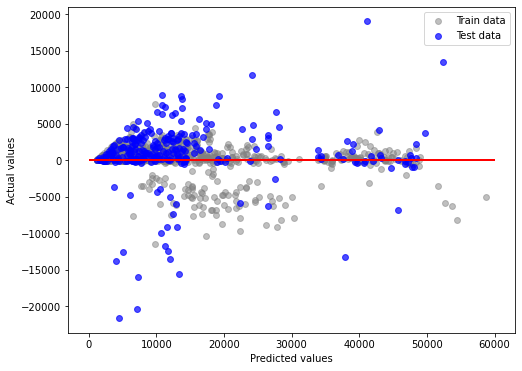

In [14]:
plt.figure(figsize=(8,6))

plt.scatter(X_train_pred, X_train_pred - y_train, c='gray', marker='o', s=35, alpha=0.5, label='Train data')

plt.scatter(X_test_pred, X_test_pred - y_test, c='blue', marker='o', s=35, alpha=0.7, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')

plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red');

#### Feature importance ranking

In [15]:
print('Feature importance ranking\n')

importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []

for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d. %s - %f" % (f + 1, variable, importances[indices[f]]))

Feature importance ranking

1. smoker - 0.601678
2. bmi - 0.218724
3. age - 0.136971
4. children - 0.021047
5. region - 0.015208
6. sex - 0.006371


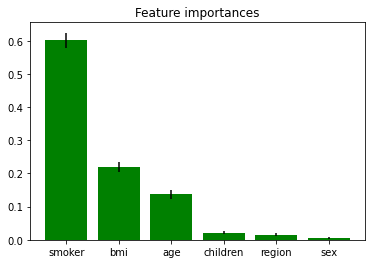

In [16]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices], color="green", yerr=std[indices], align="center");

## Applying Polynomial Regression

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Dropping 'sex' and 'region' columns according to the feature importance values

X = df.drop(['charges', 'sex', 'region'], axis = 1)
y = df.charges

pol   = PolynomialFeatures(degree = 2)
X_pol = pol.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2, random_state=0)
Polr = LinearRegression()
Polr.fit(X_train, y_train)

y_train_pred = Polr.predict(X_train)
y_test_pred  = Polr.predict(X_test)

print(Polr.score(X_test, y_test))

0.8812595703345234


In [18]:
# Predicting using test data

y_pred = Polr.predict(X_test)
r2_score(y_pred, y_test)

0.863745949762296

##### Here we are getting significant improvement in accuracy from the simple Linear regression model

## Now applying some sample dataset to predict and compare the values

In [19]:
# Getting some sample values from the dataset with only important features and 'charges' column included - 
# for prediction value comparison

Xt = df.drop(['sex', 'region'], axis=1).sample(3)
Xt

,age,bmi,children,smoker,charges
1086,55,28.975,0,0,10796.35025
292,25,45.540,2,1,42112.23560
100,41,31.600,0,0,6186.12700


In [76]:
# Function for getting percentage difference between the real and predicted values

def variation(p,r):
    print("Real value      : ",r,"\nPredicted value : ",p)
    print('\n{}% variation between real and predicted value'.format(round((((p-r)/r)*100),2)))

# Predicting using above dataset values
# let the values be as follows :
# age=55, bmi=28.975, children=0, smoker=0, (y-value)charges=10796.35025

real = 10796.35025
pred = Polr.predict(pol.fit_transform([[55, 28.975, 0, 0]]))[0]

variation(pred,real)

Real value      :  10796.35025 
Predicted value :  11905.691827353772

10.28% variation between real and predicted value


In [77]:
# age=25, bmi=45.540, children=2, smoker=1, (y-value)charges=42112.23560

real = 42112.23560
pred = Polr.predict(pol.fit_transform([[25, 45.540, 2, 1]]))[0]

variation(pred,real)

Real value      :  42112.2356 
Predicted value :  48115.64283134816

14.26% variation between real and predicted value


In [79]:
# age=41, bmi=31.600, children=0, smoker=0, (y-value)charges=6186.12700

real = 6186.12700
pred = Polr.predict(pol.fit_transform([[41, 31.600, 0, 0]]))[0]

variation(pred,real)

Real value      :  6186.127 
Predicted value :  7708.164480704238

24.6% variation between real and predicted value


## Here we can see that there is close value prediction with a difference of almost 10-20% between the predicted and the real values 

# Model Deployment

In [84]:
# Here, we will save the 'Polr' model to disk as 'model.py'

import pickle

pickle.dump(Polr,open('model.pkl','wb'))
# Dump this model by the name "model.pkl" in the systems HDD and while doing this write this file using "write bytes" mode.

In [85]:
# Lets now try to load the same model by reading it from the system
# and using it for prediction

polr_model = pickle.load(open("model.pkl","rb"))

In [100]:
# NOTE: we would require to apply polynamial transformation in the app in which model will be deployed.

predicted_cost = polr_model.predict(pol.fit_transform([[55, 28.975, 0, 0]]))[0]

print('Predicted cost value of health insaurance for a person of', 
      'age=55, bmi=28.975, childern=0, non-smoker will be $ {}'.format(round(predicted_cost,2)))

Predicted cost value of health insaurance for a person of age=55, bmi=28.975, childern=0, non-smoker will be $ 11905.69
